  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


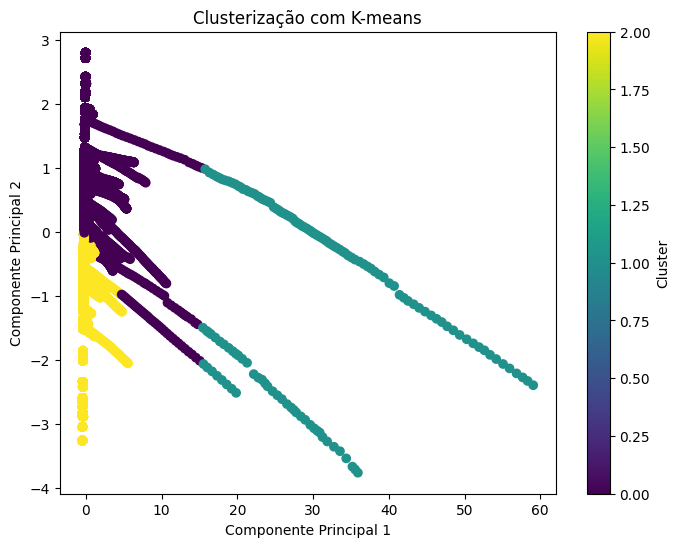

Centros dos clusters (no espaço reduzido):
[[ 0.06696416  0.78034194]
 [30.32537849 -1.06938922]
 [-0.25815288 -0.88376119]]
Número de pontos em cada cluster:
Cluster
0    26074
1      137
2    22857
dtype: int64


In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Carregando os dados
data = pd.read_csv("covid_19_clean_complete.csv")

# Exibindo as primeiras linhas dos dados para entender como eles são
print(data.head())

# Selecionando apenas as colunas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Normalizando os dados numéricos para que todas as variáveis fiquem na mesma escala
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Reduzindo as dimensões para 2 componentes principais (para facilitar a visualização)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Aplicando o algoritmo K-means para identificar 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Você pode mudar o número de clusters se quiser
kmeans.fit(reduced_data)

# Adicionando a coluna 'Cluster' no DataFrame para identificar a qual cluster cada ponto pertence
data['Cluster'] = kmeans.labels_

# Plotando os clusters em um gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Clusterização com K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')  # Adicionando uma barra de cores para identificar os clusters
plt.show()

# Exibindo os centros dos clusters no espaço reduzido
centers = kmeans.cluster_centers_
print("Centros dos clusters (no espaço reduzido):")
print(centers)

# Exibindo o número de pontos em cada cluster
print("Número de pontos em cada cluster:")
print(data.groupby('Cluster').size())


In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("covid_19_clean_complete.csv")

# Selecionando variáveis independentes e variável alvo
X = data[['Confirmed', 'Deaths']]  # Ajuste conforme o nome correto
y = data['Recovered']  # Target variável binária

# Exibe todos os nomes das colunas
print(data.columns)

# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalonando as variáveis
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializando e treinando o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizando previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred))

print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')
